<b>Implementation of K Means Clustering Algorithm in Python</b>

<b>Install necessary packages</b>

In [ ]:
!pip install numpy matplotlib Pillow

In [1]:
#Import the packages
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
class KMeans:
    '''Initialize the class with default k and max_iter.'''
    def __init__(self, k=2, max_iter=100):
        self.k = k
        self.max_iter = max_iter

    def fit(self, X):
        '''This function uses k means algorithm to fit the input dataset'''
        # Set the initial centroids to randomly selected points in data
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]
        for i in range(self.max_iter):
            # Calculate the distance of all instances from all the cluster
            # Set label of each instance based on their distance from the nearest cluster
            distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
            self.labels = np.argmin(distances, axis=0)
            # For instances in same cluster, calculate their centroid and update 
            for j in range(self.k):
                self.centroids[j] = X[self.labels == j].mean(axis=0)

    def predict(self, X):
        '''This function predict the label of the instance by calculating the
        distance from the nearest cluster'''
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

<b>Generating 2D synthetic dataset</b>

In [2]:
# Example usage
np.random.seed(42)
N = 1000
K = 3
means = np.array([[0, 0], [5, 5], [10, 0]])
cov = np.eye(2)
# this is a 3x1000 array of random multivariate normal distributions
X = np.vstack([np.random.multivariate_normal(mean, cov, int(N / K)) for mean in means])

<b>Testing kmeans for k=1</b>

The centroids of clusters are:
 [[5.03338259 1.7244515 ]]



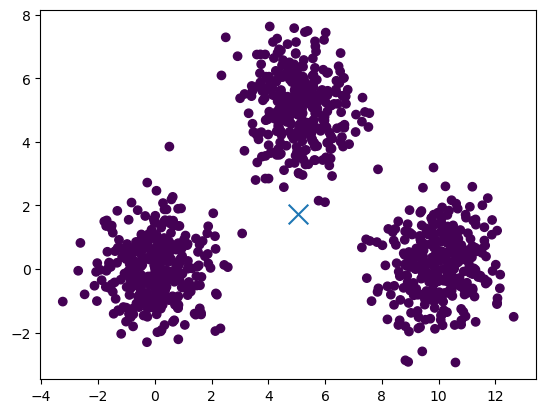

In [5]:
kmeans = KMeans(k=1)
kmeans.fit(X)
print(f'The centroids of clusters are:\n {kmeans.centroids}\n')

plt.scatter(X[:,0], X[:,1], c=kmeans.labels)
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], marker='x', s=200)
plt.show()

<b>Testing kmeans for k=2</b>

The centroids of clusters are:
 [[-6.24189782e-03 -7.37147324e-03]
 [ 7.55319484e+00  2.59036299e+00]]



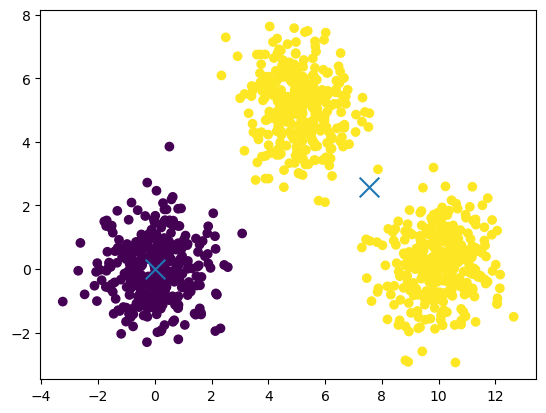

In [6]:
kmeans = KMeans(k=2)
kmeans.fit(X)
print(f'The centroids of clusters are:\n {kmeans.centroids}\n')

plt.scatter(X[:,0], X[:,1], c=kmeans.labels)
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], marker='x', s=200)
plt.show()

<b>Testing kmeans for k=3</b>

The centroids of clusters are:
 [[ 1.00269402e+01  9.17913538e-02]
 [ 5.09426238e+00  5.07397312e+00]
 [-6.24189782e-03 -7.37147324e-03]]



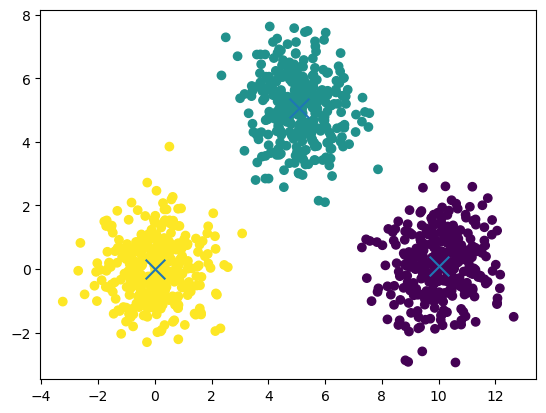

In [7]:
kmeans = KMeans(k=3)
kmeans.fit(X)
print(f'The centroids of clusters are:\n {kmeans.centroids}\n')

plt.scatter(X[:,0], X[:,1], c=kmeans.labels)
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], marker='x', s=200)
plt.show()

<b>Testing kmeans for k=4</b>

The centroids of clusters are:
 [[ 4.94853569e+00  5.86488148e+00]
 [ 1.00269402e+01  9.17913538e-02]
 [-6.24189782e-03 -7.37147324e-03]
 [ 5.26054026e+00  4.17152640e+00]]



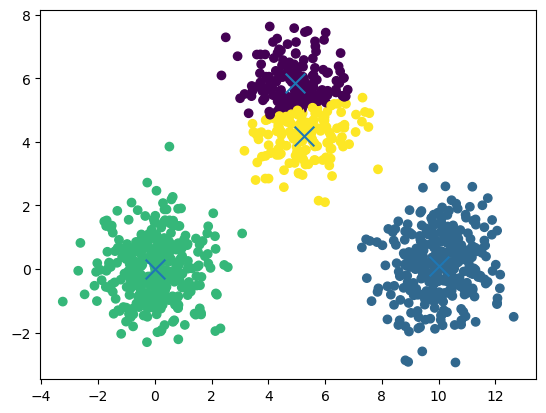

In [8]:
kmeans = KMeans(k=4)
kmeans.fit(X)
print(f'The centroids of clusters are:\n {kmeans.centroids}\n')

plt.scatter(X[:,0], X[:,1], c=kmeans.labels)
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], marker='x', s=200)
plt.show()

<b>Testing K means on a Mandril image</b>

<b>Load the mandril image using PIL library</b>

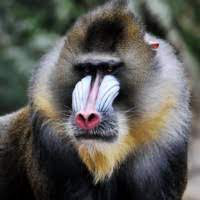

In [3]:
mandril = Image.open('./mandril.jpg')
mandril

<b>Convert the image into numpy array of rgb values</b>

In [4]:
mandril_rgb = np.array(mandril.getdata())

<b>Train the k means algorithm on mandril rgb values for k=2</b>

In [5]:
kmeans = KMeans(k=2)
kmeans.fit(mandril_rgb)
print(f'The centroids of clusters are:\n {kmeans.centroids}\n')

The centroids of clusters are:
 [[148 144 140]
 [ 45  46  42]]



<b>Replace the color of each pixel with value of centroid of cluster</b>

In [6]:
rgb_means_img = np.array(mandril_rgb)
for i in range(len(mandril_rgb)):
    rgb_means_img[i] = kmeans.centroids[kmeans.labels[i]]
display_image = np.array(rgb_means_img.reshape((200,200,3)), dtype=np.uint8)

<b>Use plotly px.show to plot the segmented image</b>

In [7]:
import plotly.express as px
fig = px.imshow(display_image)
fig.show()

<b>Test kmeans on mandril rgb values for k=3</b>

In [8]:
kmeans = KMeans(k=3)
kmeans.fit(mandril_rgb)
print(f'The centroids of clusters are:\n {kmeans.centroids}\n')
rgb_means_img = np.array(mandril_rgb)
for i in range(len(mandril_rgb)):
    rgb_means_img[i] = kmeans.centroids[kmeans.labels[i]]
display_image = np.array(rgb_means_img.reshape((200,200,3)), dtype=np.uint8)
fig = px.imshow(display_image)
fig.show()

The centroids of clusters are:
 [[ 31  32  30]
 [175 172 172]
 [103 100  92]]



<b>Test k means on mandril rgb values for k=4</b>

In [119]:
kmeans = KMeans(k=4)
kmeans.fit(mandril_rgb)
print(f'The centroids of clusters are:\n {kmeans.centroids}\n')
rgb_means_img = np.array(mandril_rgb)
for i in range(len(mandril_rgb)):
    rgb_means_img[i] = kmeans.centroids[kmeans.labels[i]]
display_image = np.array(rgb_means_img.reshape((200,200,3)), dtype=np.uint8)
fig = px.imshow(display_image)
fig.show()

The centroids of clusters are:
 [[124 119 110]
 [ 67  70  63]
 [183 180 182]
 [ 21  21  21]]

